## Investigasi sampel data titanic berikut dengan cara :
1. Cek secara head, tail, sample, info lalu observasi apa yang bisa anda peroleh ?
2. Lakukan Statistical Summary dengan mengekstrak informasi yang didapat dari observasi anda ?
3. Cek apakah ada duplikat dan bagaimana handlenya ?
4. Cek apakah ada missing value, berapa persentasenya jika ada, dan bagaimana cara handlenya ?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Load Data

In [3]:
# import data
df = pd.read_excel('/content/drive/My Drive/dibimbing/titanic.xlsx')
data = df.copy()

# Understanding the Dataset

In [4]:
data.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [5]:
data.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [6]:
data.sample(5)

,survived,name,sex,age
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0
217,0,"Nicholson, Mr. Arthur Ernest",male,64.0
423,0,"Gill, Mr. John William",male,24.0
136,1,"Gracie, Col. Archibald IV",male,53.0
322,1,"Young, Miss. Marie Grice",female,36.0


Observations:
1. `survived` and `age` column, are numeric
2. `name` and `sex` column, are categorical
3. `sex` column seems to contain two distinct values (male OR fmale), but will confirm later
3. `survived` is apparently also binary (0,1)
4. No obvious defect on the data (column name vs its entries), all looks good
5. Data values in the `age` column are of the float datatype. Decimal values help to give a more accurate age, especially for children under one year old

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


Observation:
1. Data contains 4 columns with 500 rows
2. Only `age` column has missing values, they will be handled later
3. All dtypes seem OK (appropriate), given the corresponding column name

# Explore the Data

## Statistical Summary

In [8]:
data.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [9]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['name', 'sex']

numericals = ['survived', 'age']

## Describe Numerical Columns

In [10]:
# Syntax numerical statistical summary
data[numericals].describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


Observation:
* Overall, the minimum and maximum values make sense for each column
* Mean ~ 50% (Median) in `age` column, indicating somewhat a symmetrical distribution
* `survived` column is boolean/binary column since the value is 0 or 1, no need to conclude its simmetricity. Only need to check balance level
* The mean of the `survived` column is 0.54 slightly above 0.5, from which we can infer that there are slightly more survivors (1) than non-survivors (0).

## Describe Categorical Columns

In [11]:
# Syntax describe method on categorical data
data[categoricals].describe()

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288


Observations:
* `sex` have 2 unique value, 'male', and 'female'
* Survivors are mostly male with 288 rows and the rest are female
* `name` column has 2 duplicated values, shown by the 499 unique values instead of 500
* There is no missing values in categoricals column

## Numerical Details

In [12]:
for col in numericals:
  print(f"==== {col} ====")
  print(data[col].value_counts(), '\n')

==== survived ====
survived
1    270
0    230
Name: count, dtype: int64 

==== age ====
age
24.0000    23
30.0000    20
36.0000    19
18.0000    14
42.0000    14
45.0000    14
35.0000    14
22.0000    12
28.0000    12
23.0000    11
21.0000    11
31.0000    11
48.0000    11
25.0000    11
29.0000    10
54.0000    10
50.0000    10
34.0000    10
47.0000    10
39.0000     9
27.0000     9
33.0000     8
49.0000     8
38.0000     8
19.0000     8
40.0000     8
55.0000     8
32.0000     7
60.0000     7
17.0000     7
26.0000     7
44.0000     6
52.0000     6
37.0000     6
58.0000     6
64.0000     5
46.0000     5
57.0000     5
51.0000     5
16.0000     4
53.0000     4
56.0000     4
43.0000     4
62.0000     4
61.0000     4
1.0000      3
8.0000      3
63.0000     3
41.0000     3
15.0000     2
71.0000     2
20.0000     2
65.0000     2
4.0000      2
6.0000      2
2.0000      1
0.9167      1
14.0000     1
11.0000     1
76.0000     1
59.0000     1
80.0000     1
28.5000     1
32.5000     1
70.0000     

Observations:
* From the dataset shows that 270 passengers survived, which is slightly higher than the 230 passengers who did not survive
* Ages 24, 30, and 36 were the most common among the other passengers.

## Categoricals Details

In [13]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of name column
name
Eustis, Miss. Elizabeth Mussey                                                        2
Becker, Miss. Ruth Elizabeth                                                          1
Becker, Miss. Marion Louise                                                           1
Becker, Master. Richard F                                                             1
Beauchamp, Mr. Henry James                                                            1
Beane, Mrs. Edward (Ethel Clarke)                                                     1
Beane, Mr. Edward                                                                     1
Bateman, Rev. Robert James                                                            1
Banfield, Mr. Frederick James                                                         1
Ball, Mrs. (Ada E Hall)                                                               1
Baimbrigge, Mr. Charles Robert                                                        1

Observations:
* There is duplicate data found in the name "Eustis, Miss. Elizabeth Mussey"
* The number of male passengers which is 288 compared to female passengers which is only 212 detects an imbalance in gender dataset

# Data Cleaning

##  Duplicate Handling

In [14]:
len(data)

500

In [15]:
len(data.drop_duplicates())

499

In [16]:
len(data.drop_duplicates()) / len(data)
#if the output of the code in this cell is not 1 then there are duplicates

0.998

In [17]:
list(data.columns)

['survived', 'name', 'sex', 'age']

In [18]:
# Step 1: Capture duplicate rows (including the original one)
duplicates = data[data.duplicated(keep=False)]

duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [19]:
# Step 2: Calculate the frequency of occurrence of each duplicate row
duplicate_counts = duplicates.groupby(list(data.columns)).size().reset_index(name='duplicate_count')

# Step 3: Sort by number of duplicates
sorted_duplicates = duplicate_counts.sort_values(by='duplicate_count', ascending=False)

sorted_duplicates

,survived,name,sex,age,duplicate_count
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [20]:
#Handling Drop duplicate
data = data.drop_duplicates()

In [21]:
len(data.drop_duplicates()) / len(data)

1.0

## Missing Value Handling

In [22]:
# Identifying Missing value
data.isna().sum()

,0
survived,0
name,0
sex,0
age,49


In [23]:
data.isnull().sum()

,0
survived,0
name,0
sex,0
age,49


In [24]:
for column in data.columns:
    print(f"============= {column} =================")
    display(data[column].value_counts())
    print()

============= survived =================


,count
survived,
1,269
0,230



============= name =================


,count
name,
"McCrae, Mr. Arthur Gordon",1
"Allen, Miss. Elisabeth Walton",1
"Allison, Master. Hudson Trevor",1
"Lehmann, Miss. Bertha",1
"Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)",1
"Laroche, Mr. Joseph Philippe Lemercier",1
"Laroche, Miss. Simonne Marie Anne Andree",1
"Laroche, Miss. Louise",1
"Lamb, Mr. John Joseph",1



============= sex =================


,count
sex,
male,288
female,211



============= age =================


,count
age,
24.0000,23
30.0000,20
36.0000,19
18.0000,14
42.0000,14
45.0000,14
35.0000,14
22.0000,12
28.0000,12


In [25]:
# percentage version
total_rows = len(data)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in data.columns:
    missing_count = data[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'survived' Has 0 missing values (0.00%)
Column 'name' Has 0 missing values (0.00%)
Column 'sex' Has 0 missing values (0.00%)
Column 'age' Has 49 missing values (9.82%)


The percentage of missing values below 20% so we handle numerically with median, categorical with mode. Since the categoricals column (`name` & `sex`) and one of numericals column (`survived`) don't have any missing values, we're focusing on the numericals `age` column.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       450 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


In [27]:
data['age'].median()

35.0

In [28]:
#Handling the missing value specifically on 'age' column using .fillna() method
data['age'] = data['age'].fillna(data['age'].median())

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


In [37]:
# percentage version
total_rows = len(data)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in data.columns:
    missing_count = data[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'survived' Has 0 missing values (0.00%)
Column 'name' Has 0 missing values (0.00%)
Column 'sex' Has 0 missing values (0.00%)
Column 'age' Has 0 missing values (0.00%)


# Get to Know the Data

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

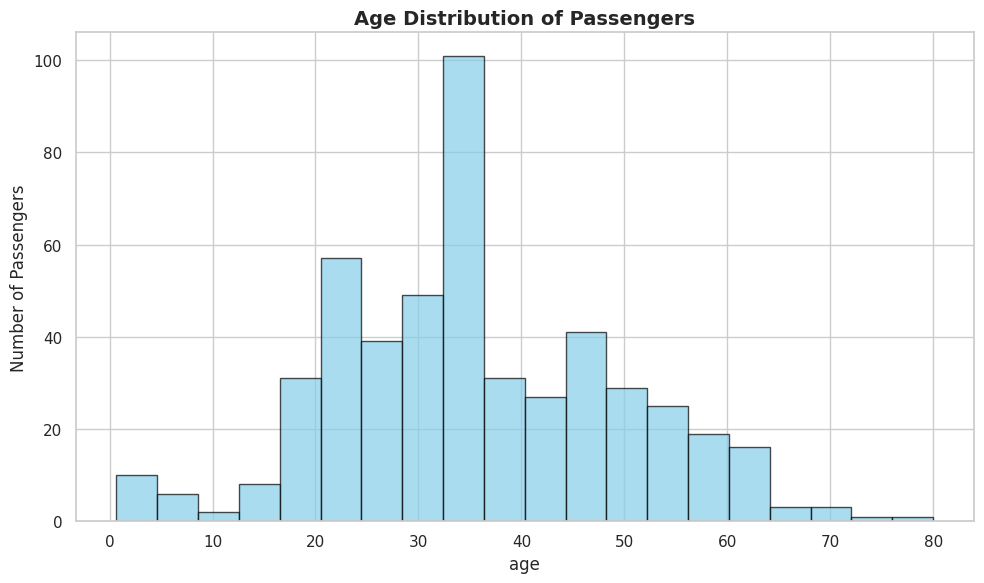

In [34]:
plt.figure(figsize=(10, 6))
data['age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Passengers', fontsize=14, weight='bold')
plt.xlabel('age')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()

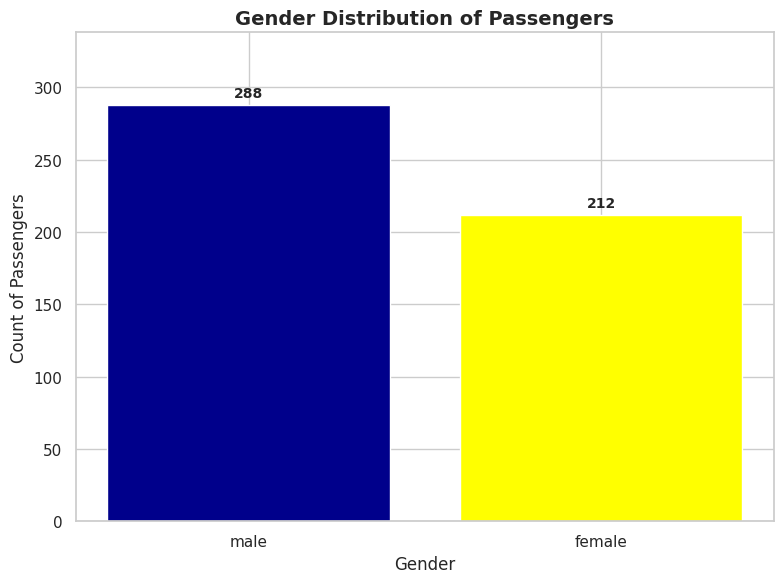

In [38]:
# Gender Distribution Chart
plt.figure(figsize=(8, 6))
gender_counts = df['sex'].value_counts()
bars = plt.bar(gender_counts.index, gender_counts.values, color=['darkblue', 'yellow'])

# Tambahkan angka di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', fontsize=10, weight='bold')

plt.title('Gender Distribution of Passengers', fontsize=14, weight='bold')
plt.xlabel('Gender')
plt.ylabel('Count of Passengers')
plt.ylim(0, max(gender_counts.values)+50)
plt.tight_layout()
plt.show()

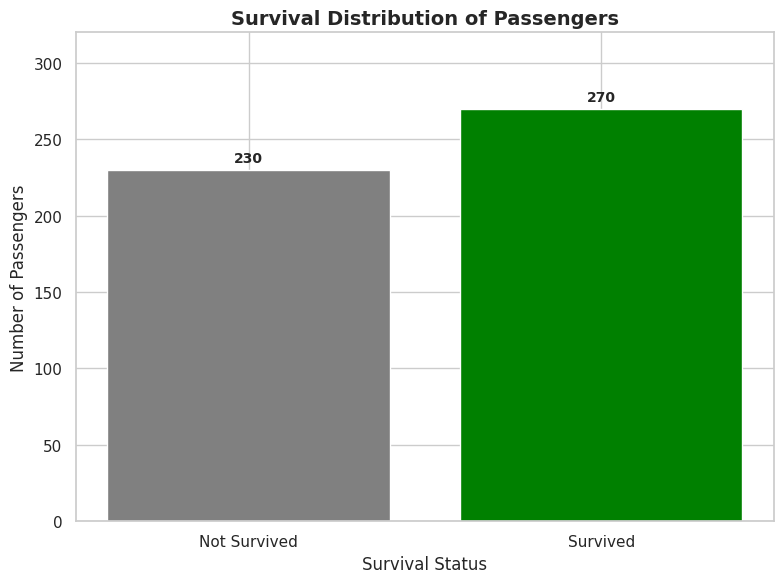

In [33]:
# Distribusi Survived
plt.figure(figsize=(8, 6))
survived_counts = df['survived'].value_counts().sort_index()
bars = plt.bar(['Not Survived', 'Survived'], survived_counts.values, color=['gray', 'green'])

# Tambahkan angka di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', fontsize=10, weight='bold')

plt.title('Survival Distribution of Passengers', fontsize=14, weight='bold')
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.ylim(0, max(survived_counts.values) + 50)
plt.tight_layout()
plt.show()

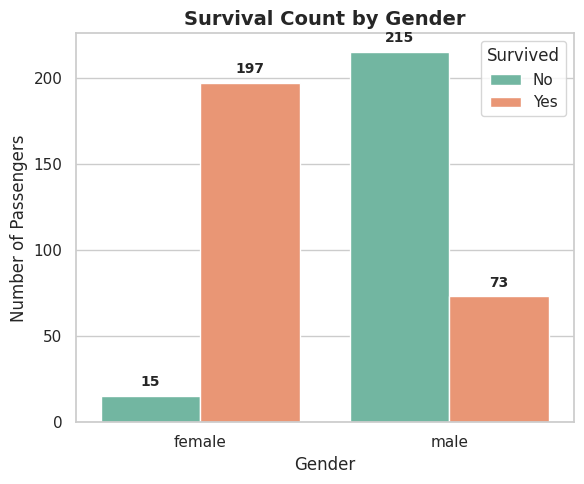

In [35]:
# Grafik Survival Berdasarkan Gender dengan angka di atas bar
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='sex', hue='survived', palette='Set2')

# Menambahkan angka di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # hanya tampilkan label jika tinggi bar > 0
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, weight='bold',
                    xytext=(0, 5), textcoords='offset points')

plt.title('Survival Count by Gender', fontsize=14, weight='bold')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()